### <i> Advanced Machine Learning Approaches for Credit Card Fraud Detection in the USA A Comprehensive Analysis </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/bhadramohit/credit-card-fraud-detection </i>
### <i> Import The Library Files </i>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#### <i> Load The Dataset </i>

In [4]:
df = pd.read_csv("credit_card_fraud_dataset.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


#### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [7]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


### <i> Data Preprocessing </i>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE


# Step 1: Convert `TransactionDate` to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Step 2: Extract features from `TransactionDate`
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek

# Drop the original `TransactionDate` column as we've extracted relevant features
df.drop(columns=['TransactionDate'], inplace=True)

# Step 3: Handle categorical variables
# Encode `TransactionType` and `Location` using LabelEncoder
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Location'] = label_encoder.fit_transform(df['Location'])

# Step 4: Handle outliers in `Amount` (Optional, based on visualization)
# Remove transactions with extremely high amounts (99th percentile)
amount_threshold = df['Amount'].quantile(0.99)
df = df[df['Amount'] <= amount_threshold]

# Step 5: Scale numerical features
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Step 6: Handle class imbalance in `IsFraud`
X = df.drop(columns=['IsFraud', 'TransactionID'])  # Exclude target and ID columns
y = df['IsFraud']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a balanced dataframe
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                         pd.DataFrame(y_resampled, columns=['IsFraud'])], axis=1)

# Step 7: Split the data into train and test sets for future modeling
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



### <i> Data Visulization And Analysis </i>

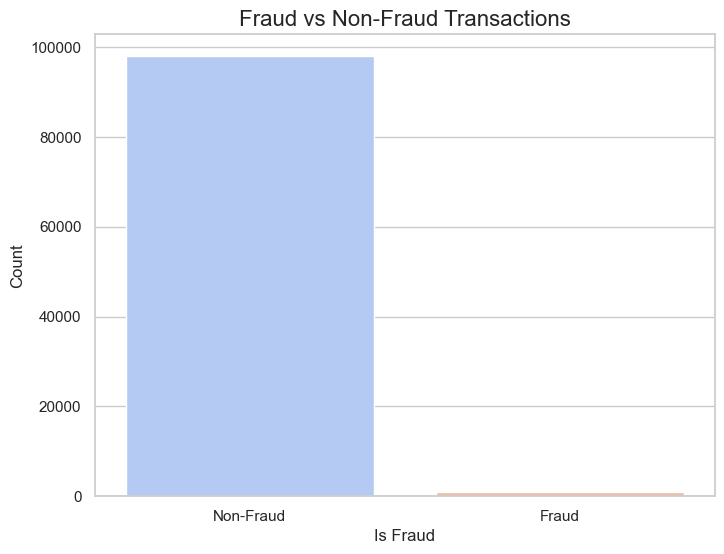

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set_theme(style="whitegrid")

# Visualization 1: Fraud vs Non-Fraud Transactions Count
plt.figure(figsize=(8, 6))
sns.countplot(x='IsFraud', data=df, palette='coolwarm')
plt.title('Fraud vs Non-Fraud Transactions', fontsize=16)
plt.xlabel('Is Fraud', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

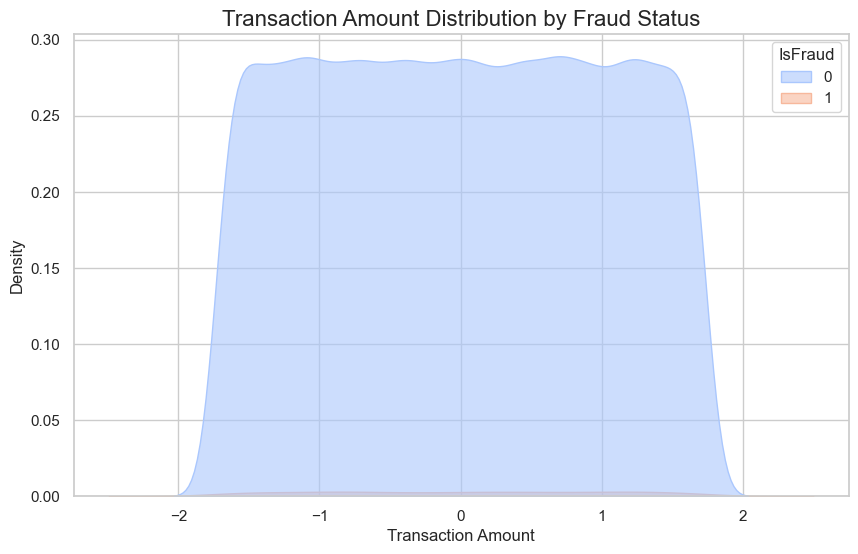

In [12]:
# Visualization 2: Transaction Amount Distribution for Fraud and Non-Fraud
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Amount', hue='IsFraud', fill=True, palette='coolwarm', alpha=0.6)
plt.title('Transaction Amount Distribution by Fraud Status', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

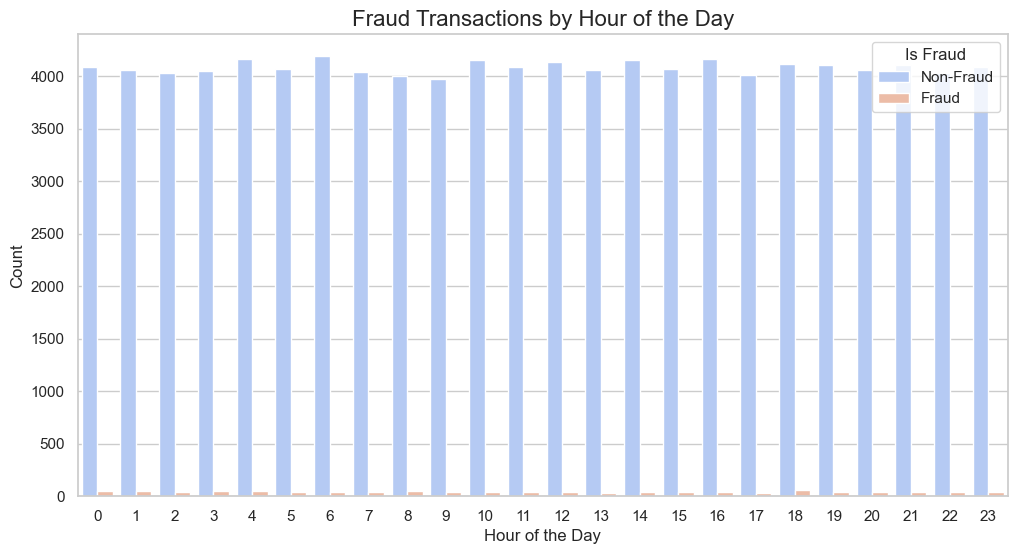

In [13]:
# Visualization 3: Fraud Transactions by Hour of the Day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='IsFraud', data=df, palette='coolwarm')
plt.title('Fraud Transactions by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

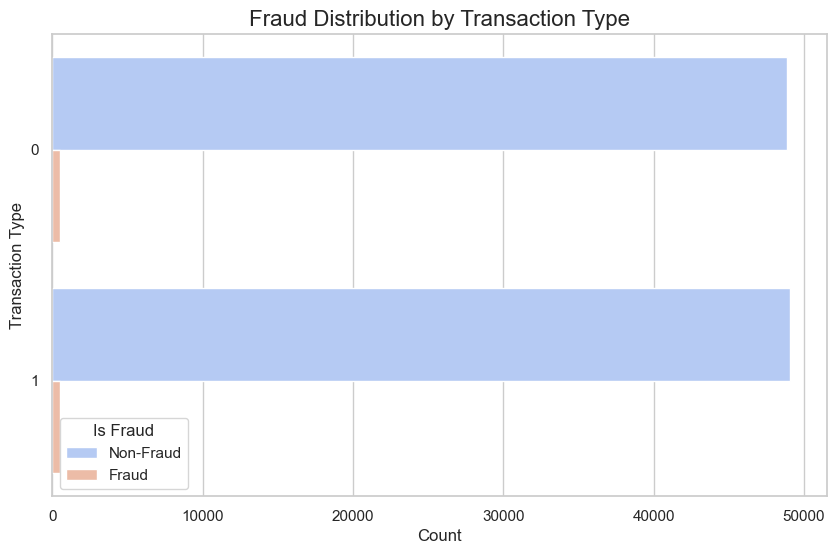

In [14]:
# Visualization 4: Fraud Distribution by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(y='TransactionType', hue='IsFraud', data=df, palette='coolwarm')
plt.title('Fraud Distribution by Transaction Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Transaction Type', fontsize=12)
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

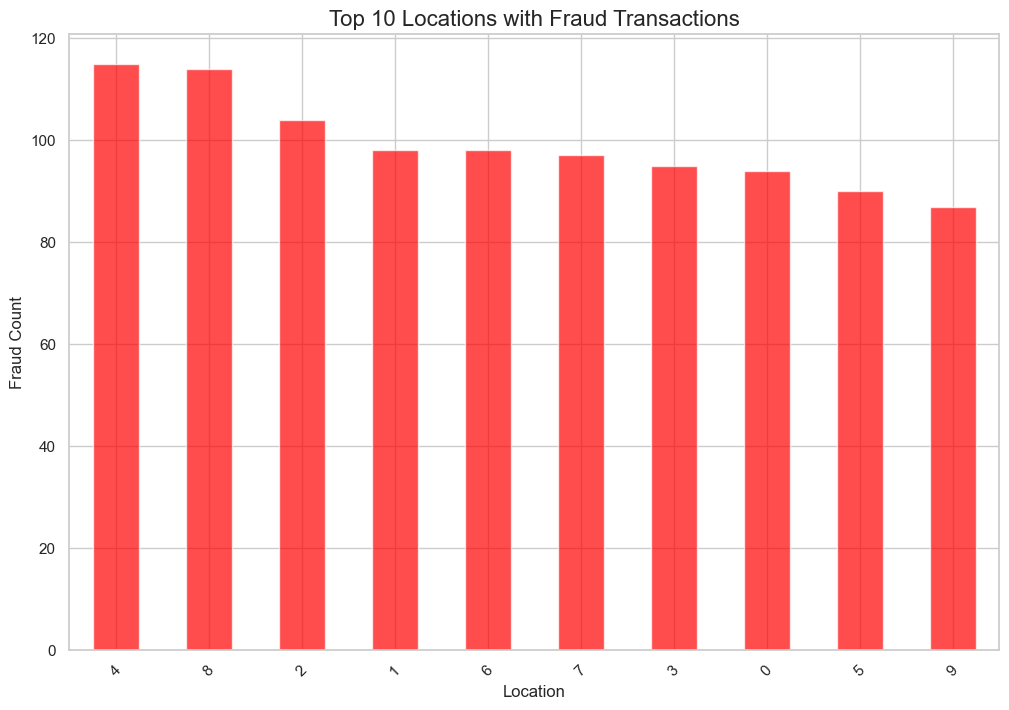

In [15]:
# Visualization 5: Fraud Transactions by Location
plt.figure(figsize=(12, 8))
fraud_by_location = df[df['IsFraud'] == 1]['Location'].value_counts().head(10)
fraud_by_location.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 10 Locations with Fraud Transactions', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


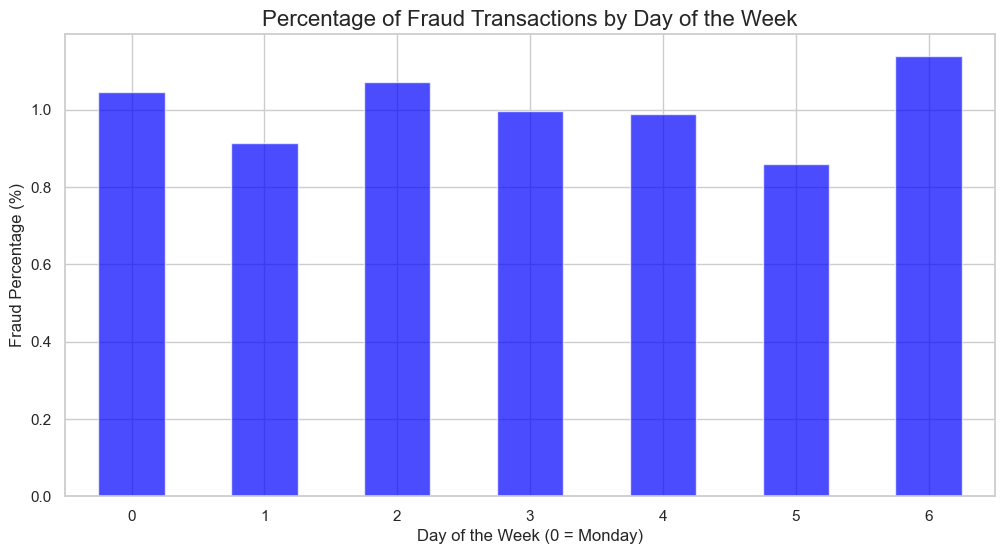

In [16]:
# Visualization 7: Percentage of Fraud Transactions by Day of the Week
plt.figure(figsize=(12, 6))
fraud_by_day = df.groupby('DayOfWeek')['IsFraud'].mean() * 100
fraud_by_day.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Percentage of Fraud Transactions by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (0 = Monday)', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

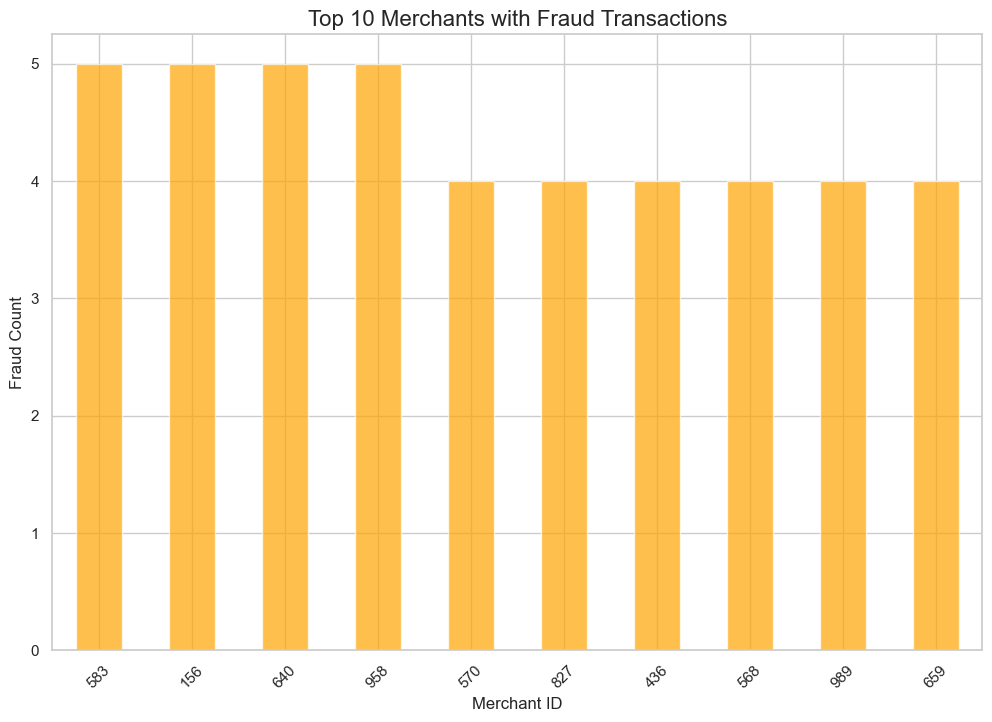

In [17]:
# Visualization 8: Fraud Count by Merchant ID (Top 10)
plt.figure(figsize=(12, 8))
fraud_by_merchant = df[df['IsFraud'] == 1]['MerchantID'].value_counts().head(10)
fraud_by_merchant.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Merchants with Fraud Transactions', fontsize=16)
plt.xlabel('Merchant ID', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

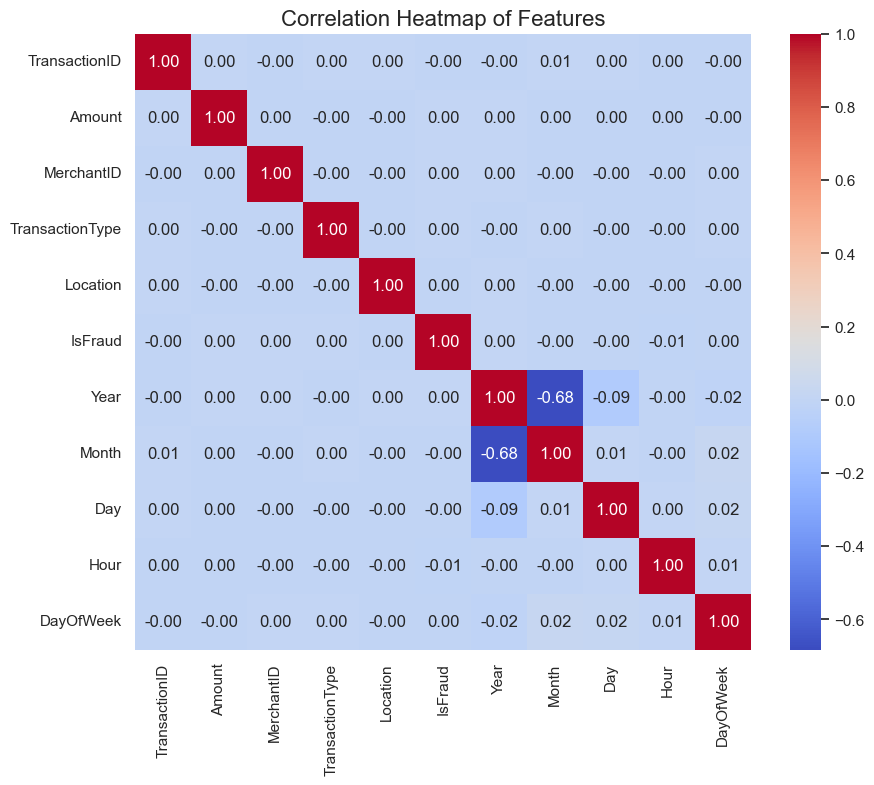

In [18]:
# Visualization 6: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Split the dataset into features and target
X = df.drop(columns=['IsFraud', 'TransactionID'])
y = df['IsFraud']

# Split into training and test sets before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_smote, y_train_smote)  # Train the model on balanced data
    y_pred = model.predict(X_test)  # Test on the original test set
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg, "Logistic Regression")

Before SMOTE:
IsFraud
0    78406
1      794
Name: count, dtype: int64

After SMOTE:
IsFraud
0    78406
1    78406
Name: count, dtype: int64

Logistic Regression Results:
Accuracy: 0.5862121212121212
Confusion Matrix:
 [[11520  8082]
 [  111    87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     19602
           1       0.01      0.44      0.02       198

    accuracy                           0.59     19800
   macro avg       0.50      0.51      0.38     19800
weighted avg       0.98      0.59      0.73     19800



### <i> Random Forest Classifier </i>

In [22]:
# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_clf, "Random Forest Classifier")


Random Forest Classifier Results:
Accuracy: 0.9741414141414141
Confusion Matrix:
 [[19287   315]
 [  197     1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     19602
           1       0.00      0.01      0.00       198

    accuracy                           0.97     19800
   macro avg       0.50      0.49      0.50     19800
weighted avg       0.98      0.97      0.98     19800



### <i> XGBoost CLassifier </i>

In [24]:
# 3. XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_and_evaluate_model(xgb_clf, "XGBoost Classifier")


XGBoost Classifier Results:
Accuracy: 0.8720707070707071
Confusion Matrix:
 [[17244  2358]
 [  175    23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     19602
           1       0.01      0.12      0.02       198

    accuracy                           0.87     19800
   macro avg       0.50      0.50      0.47     19800
weighted avg       0.98      0.87      0.92     19800



### <i> Comparison Of All Models </i>


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.586212   0.010650  0.439394  0.020796
1        Random Forest  0.974141   0.003165  0.005051  0.003891
2              XGBoost  0.872071   0.009660  0.116162  0.017836


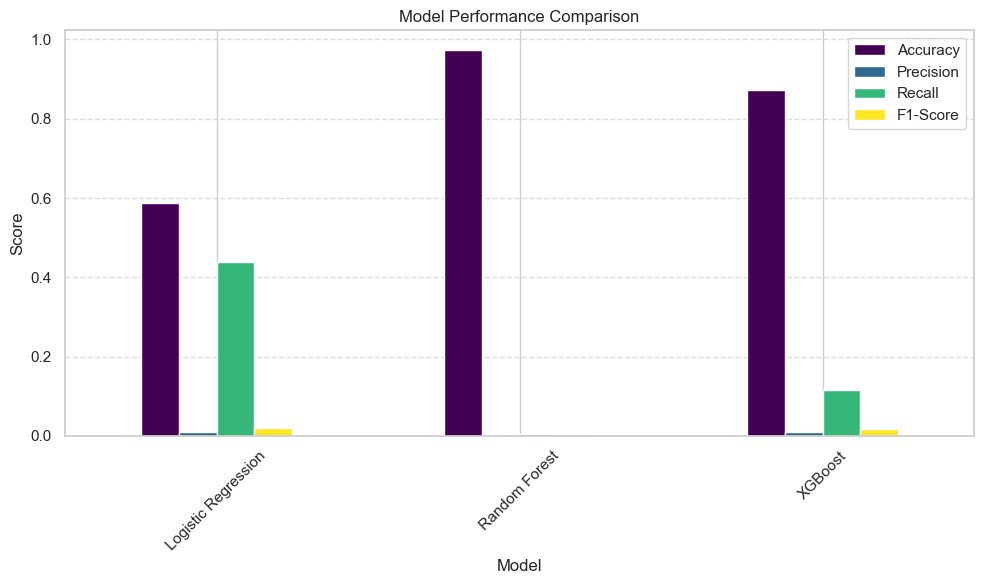

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the results of each model
model_comparison = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Function to evaluate and store model results
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_comparison["Model"].append(model_name)
    model_comparison["Accuracy"].append(accuracy)
    model_comparison["Precision"].append(precision)
    model_comparison["Recall"].append(recall)
    model_comparison["F1-Score"].append(f1)

# Evaluate each model
evaluate_model(log_reg, "Logistic Regression", X_test, y_test)
evaluate_model(rf_clf, "Random Forest", X_test, y_test)
evaluate_model(xgb_clf, "XGBoost", X_test, y_test)

# Convert the results into a DataFrame
comparison_df = pd.DataFrame(model_comparison)
print("\nModel Comparison:")
print(comparison_df)

# Plot the results for better visualization
comparison_df.set_index("Model", inplace=True)
comparison_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
